<a href="https://colab.research.google.com/github/adityachandra512/machine-learning-and-deep-learning/blob/main/Student%20Performance%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
spscientist_students_performance_in_exams_path = kagglehub.dataset_download('spscientist/students-performance-in-exams')

print('Data source import complete.')


Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Importing data


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import kagglehub

In [11]:
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

In [12]:
print(path)

/kaggle/input/students-performance-in-exams


In [13]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.shape

(1000, 8)

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data Analysis(EDA)


In [21]:
print("Categories in 'gender' variable:   ",end=" " )
print(df['gender'].unique())
print('\n')

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())
print('\n')
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print('\n')
print("Categories in 'lunch' variable:   ",end=" " )
print(df['lunch'].unique())
print('\n')
print("Categories in 'test preparation course' variable:   ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']


Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in 'lunch' variable:    ['standard' 'free/reduced']


Categories in 'test preparation course' variable:    ['none' 'completed']


In [22]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categoriecal_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_feature), numerical_feature))
print('\nWe have {} categorical features : {}'.format(len(categoriecal_feature), categoriecal_feature))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding columns for "Total Score" and "Average"

In [24]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print(f'number of student got full marks in reading {reading_full}')
print(f'number of student got full marks in writing {writing_full}')
print(f'number of student got full marks in math {math_full}')

number of student got full marks in reading 17
number of student got full marks in writing 14
number of student got full marks in math 7


In [26]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Exploring Data ( Visualization )

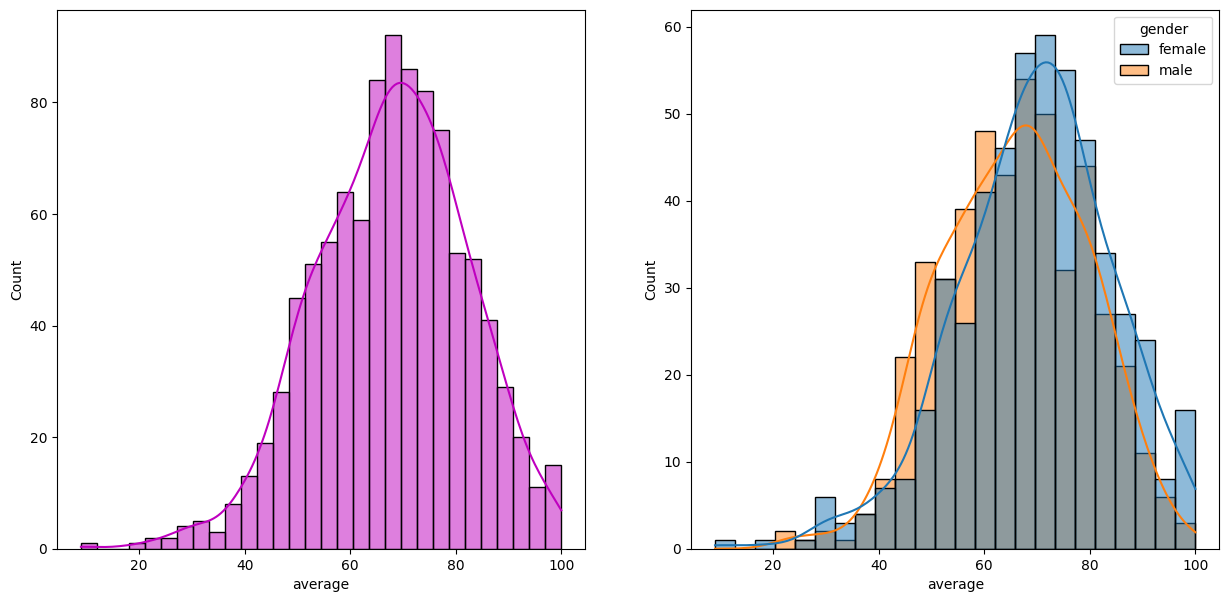

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='m')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

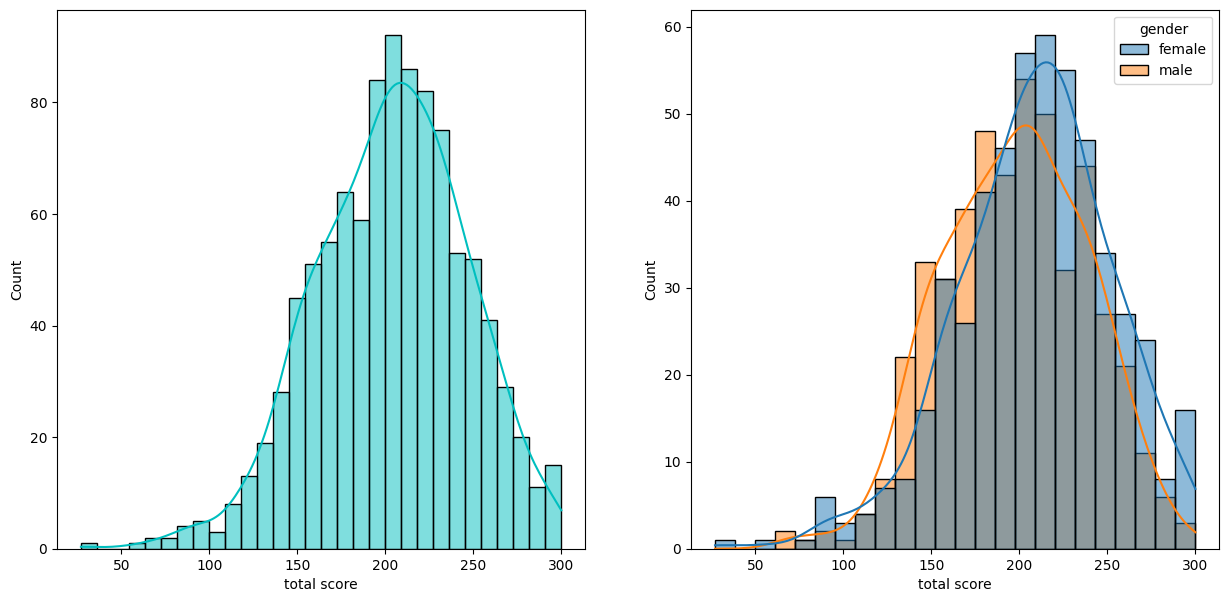

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='c')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

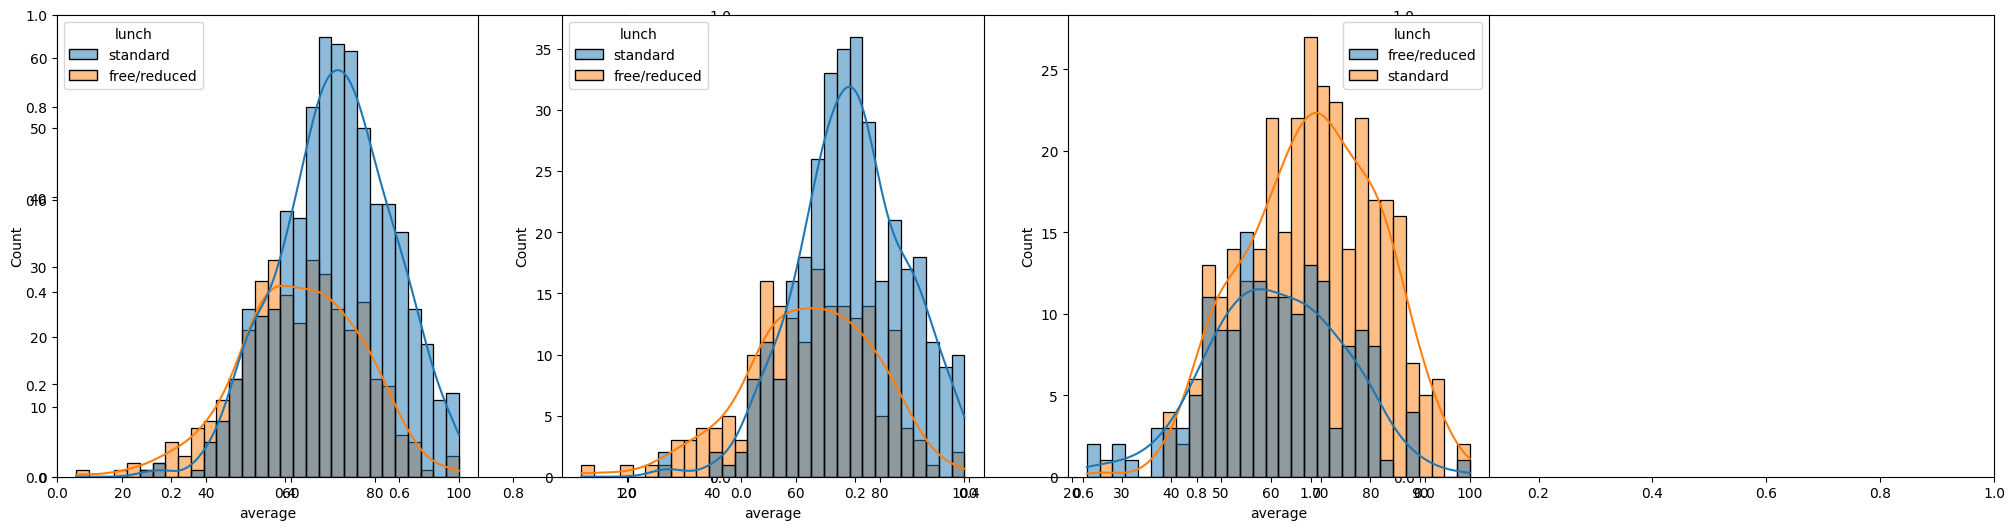

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')
plt.show()

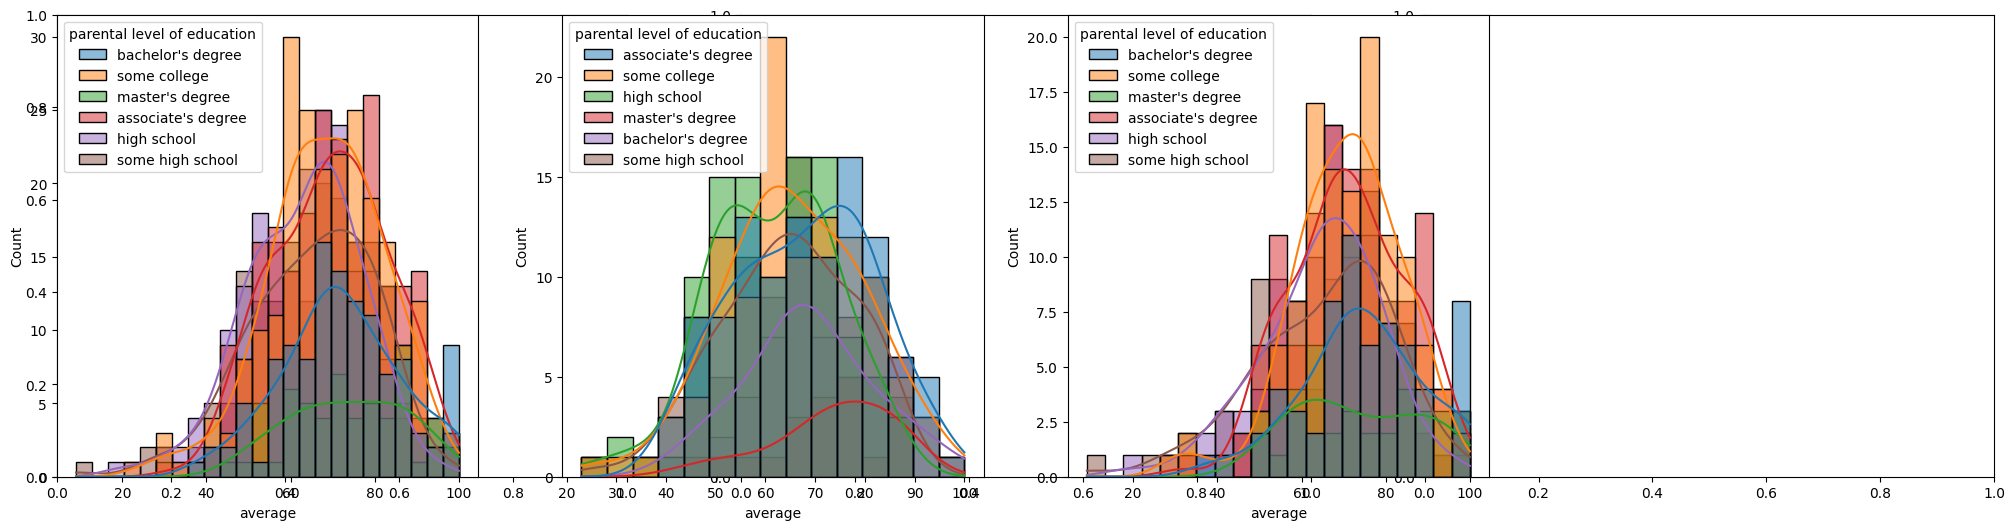

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

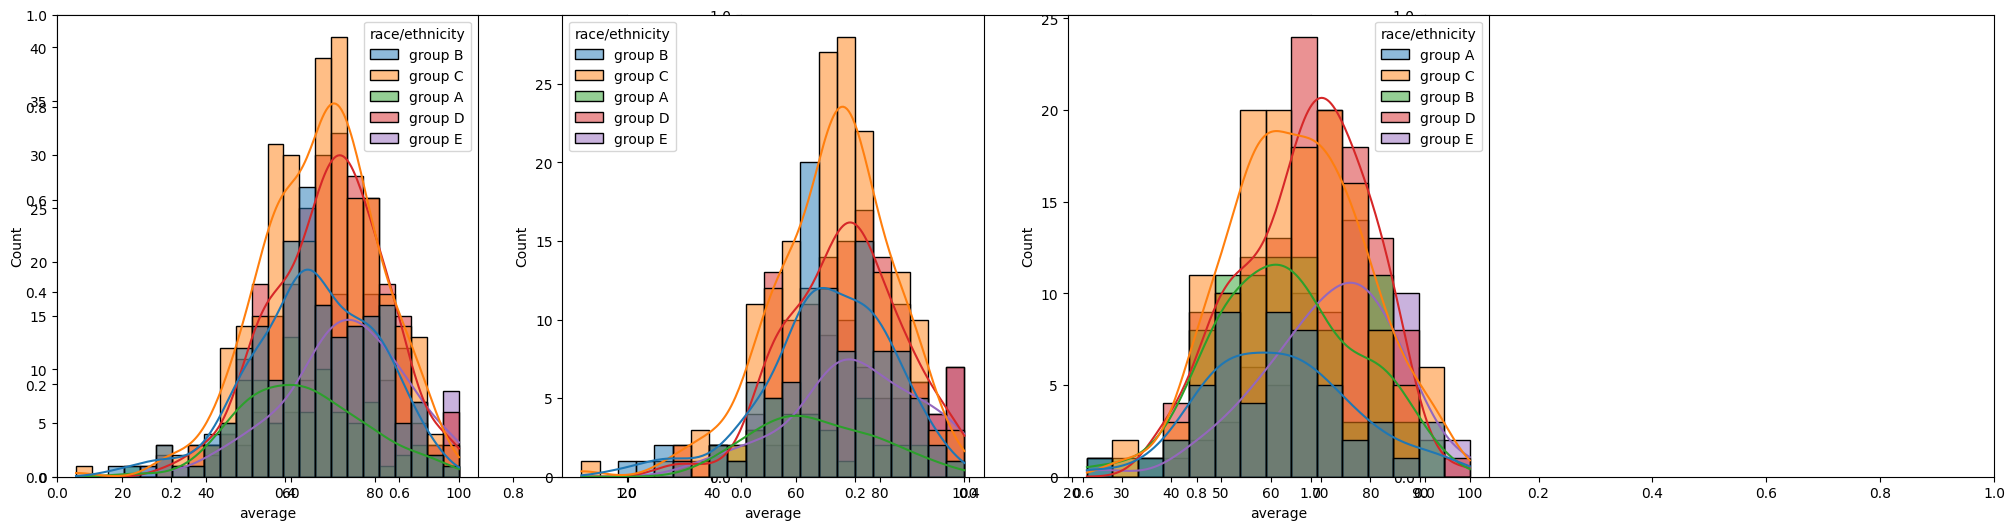

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

# Maximumum score of students in all three subjects


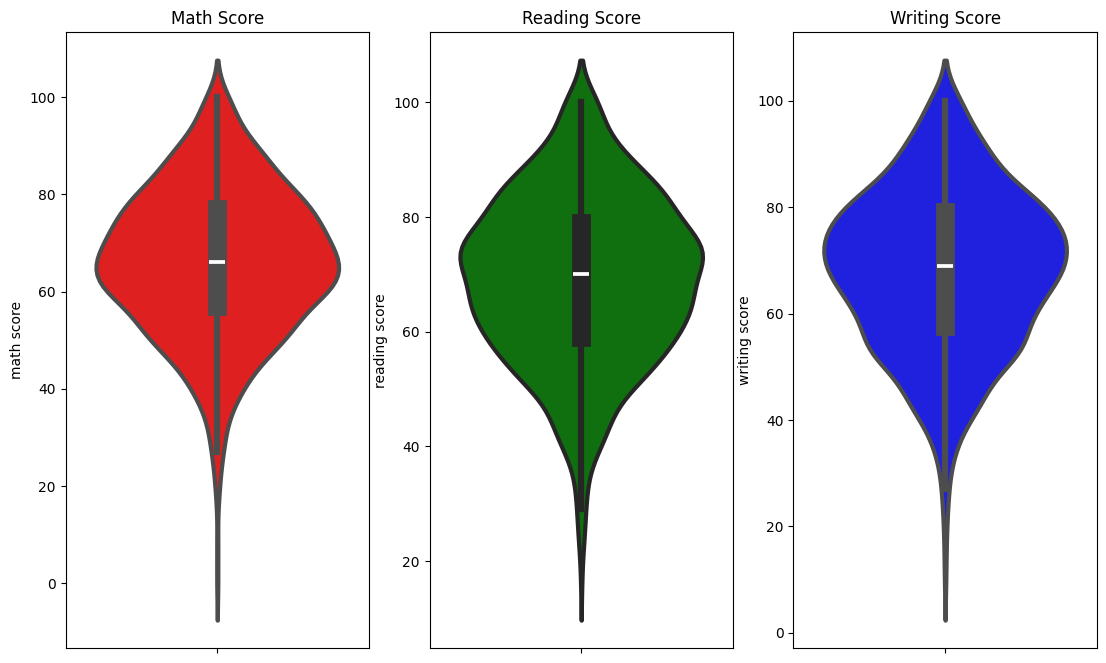

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

# Multivariate analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

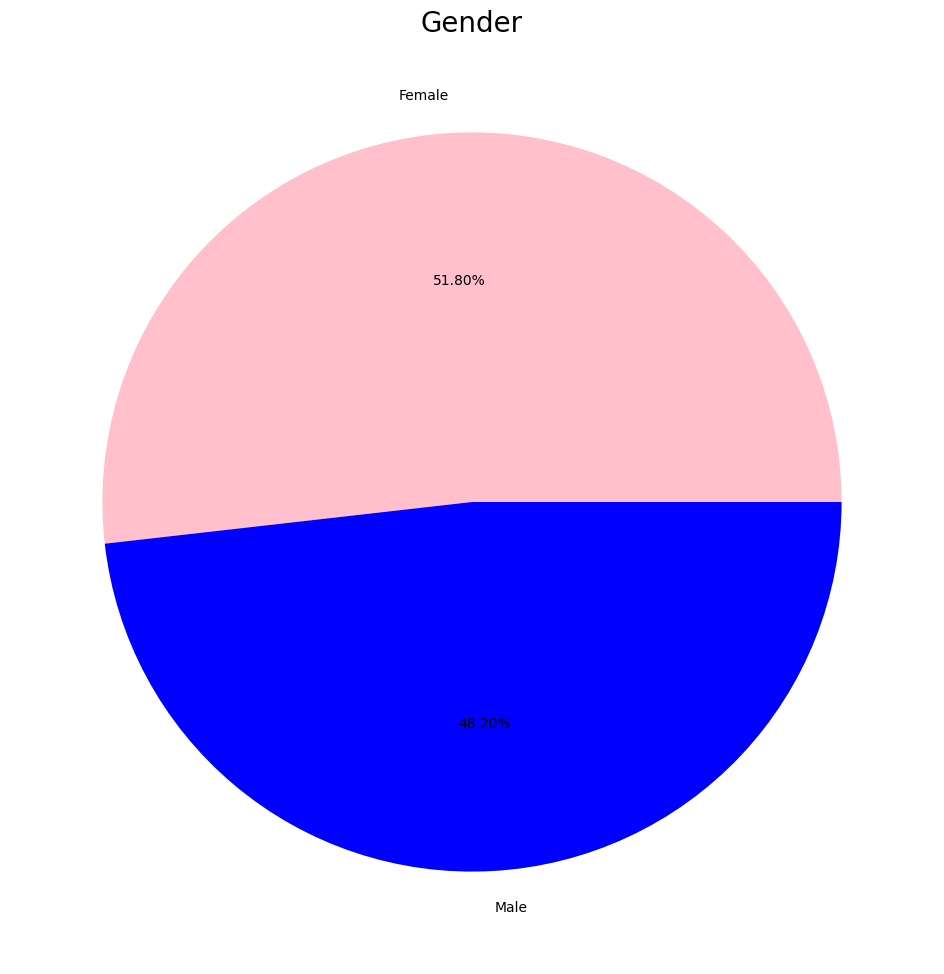

In [33]:
plt.rcParams['figure.figsize']=(30,12)
size=df['gender'].value_counts()
Labels='Female','Male'
color=['pink','blue']
plt.pie(size,labels=Labels,colors=color,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

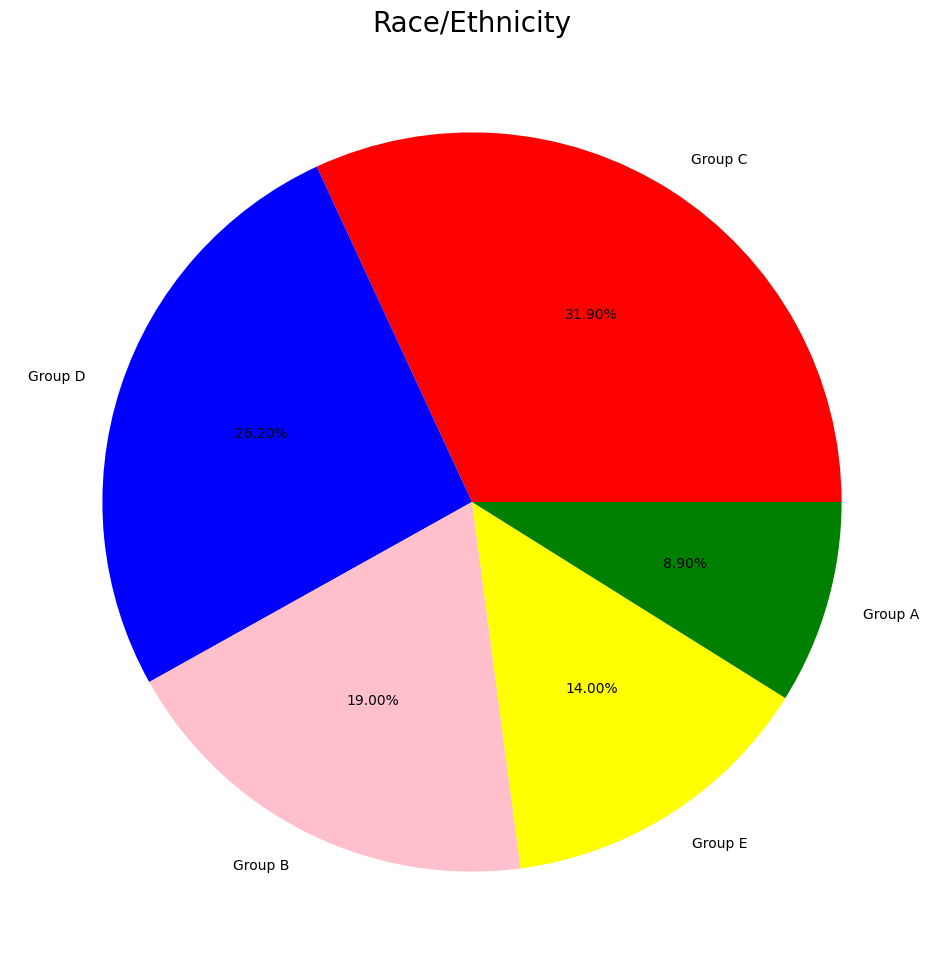

In [34]:
size=df['race/ethnicity'].value_counts()
Labels='Group C','Group D','Group B','Group E','Group A'
color=['red','blue','pink','yellow','green']
plt.pie(size,labels=Labels,colors=color,autopct='%.2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

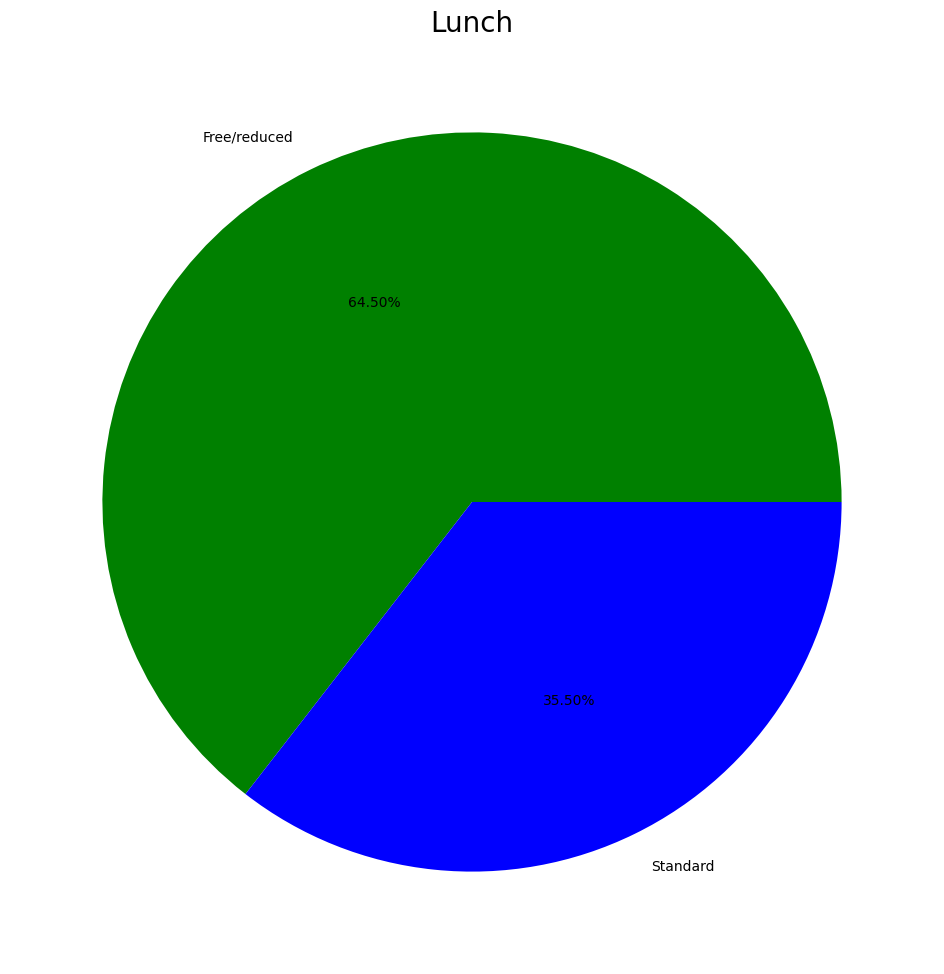

In [35]:
size=df['lunch'].value_counts()
Labels='Free/reduced','Standard'
color=['green','blue']
plt.pie(size,labels=Labels,colors=color,autopct='%.2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

Text(0.5, 1.0, 'Test Course')

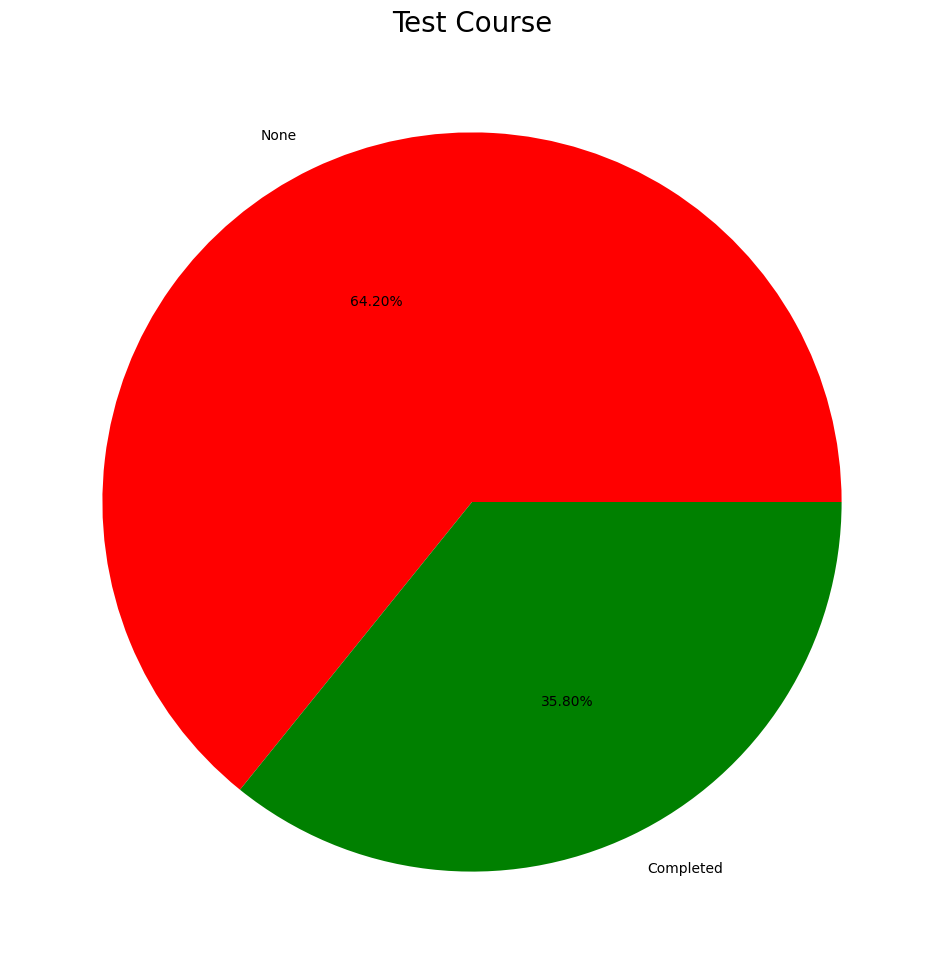

In [36]:
size=df['test preparation course'].value_counts()
Labels='None','Completed'
color=['red','green']
plt.pie(size,labels=Labels,colors=color,autopct='%.2f%%')
plt.title('Test Course',fontsize=20)

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

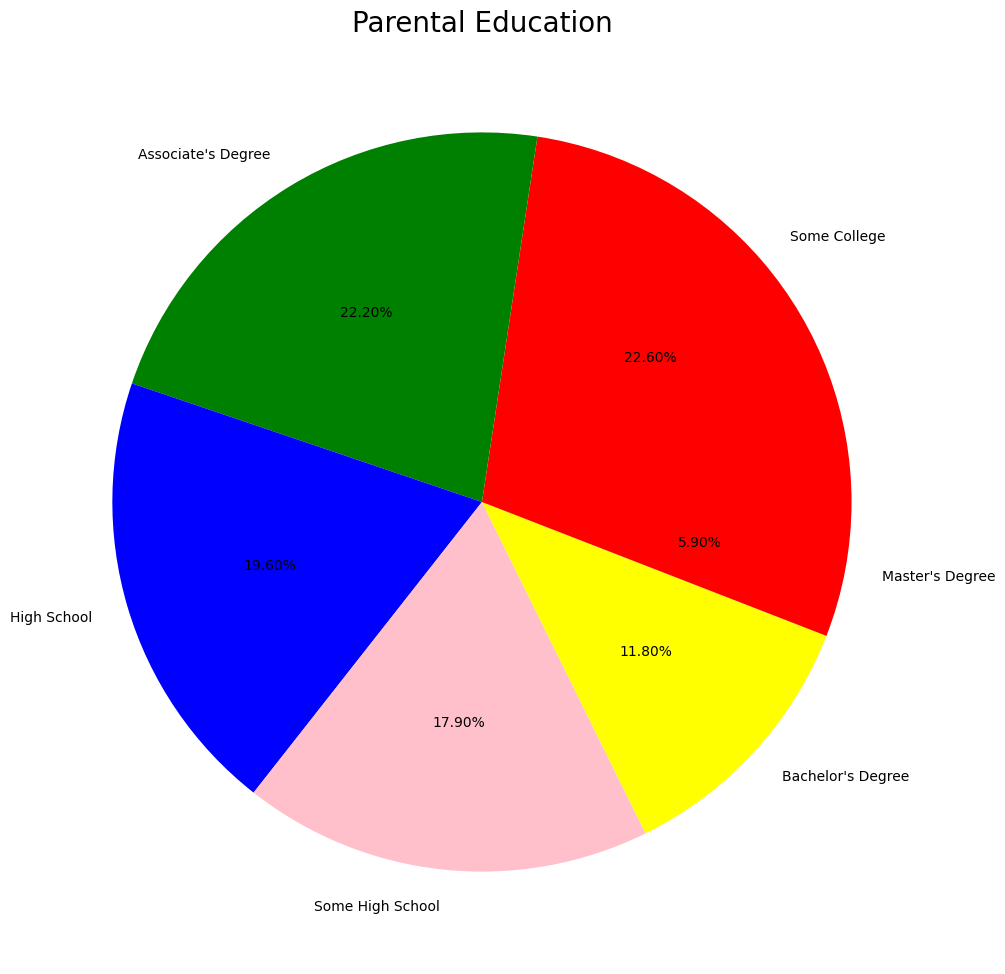

In [37]:
size=df['parental level of education'].value_counts()
Labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','pink','yellow']
plt.pie(size,labels=Labels,colors=color,autopct='%.2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )


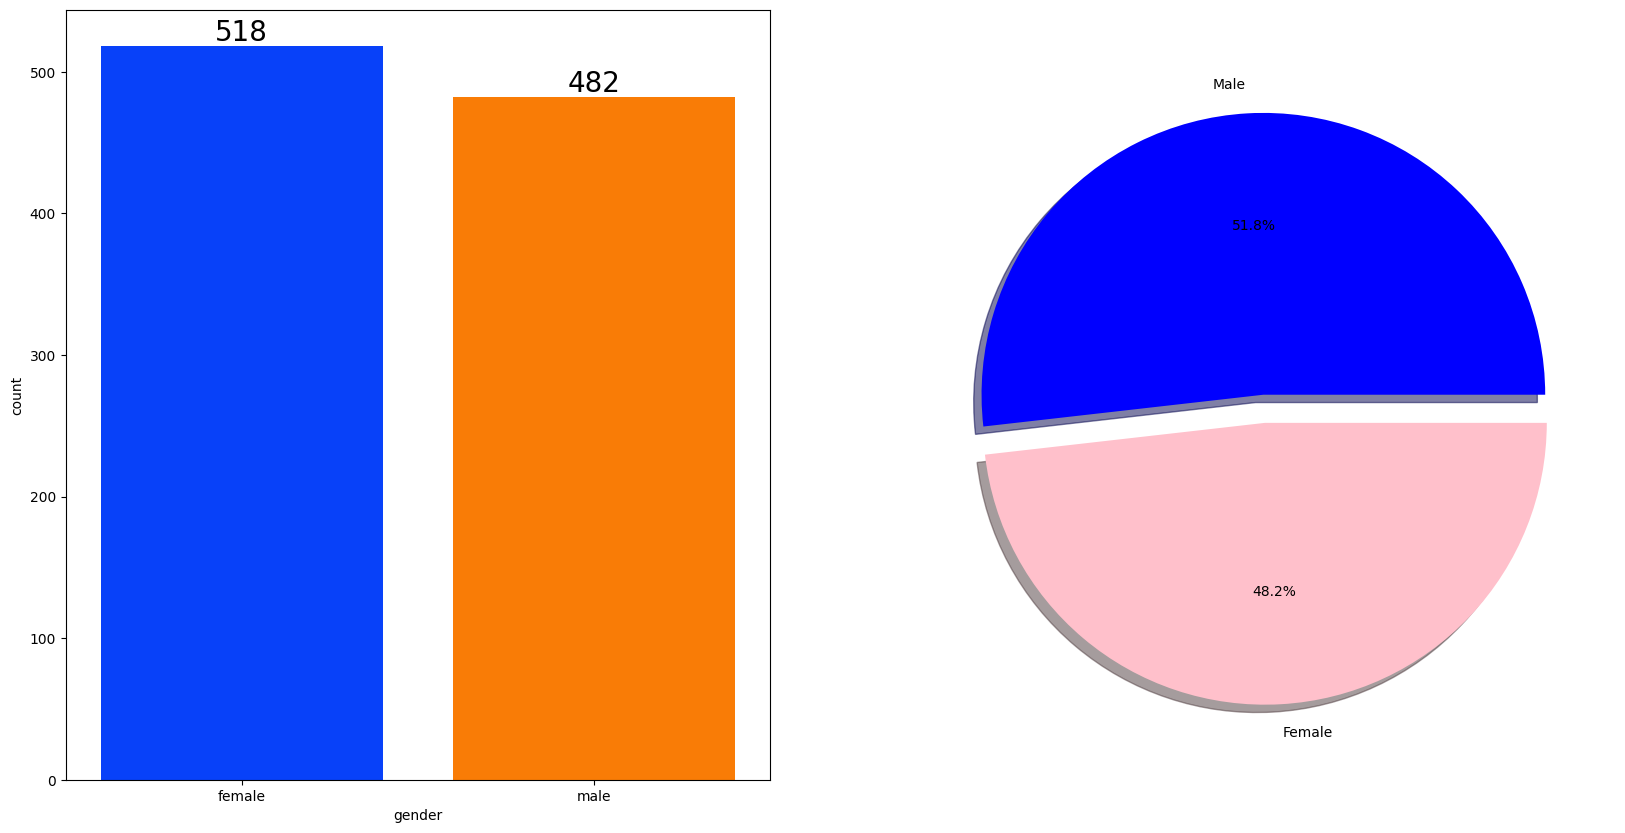

In [38]:
f,az=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=az[0],saturation=0.95)
for container in az[0].containers:
    az[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['blue','pink'])
plt.show()

# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [39]:
gender_group=df.groupby('gender')
gender_group

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


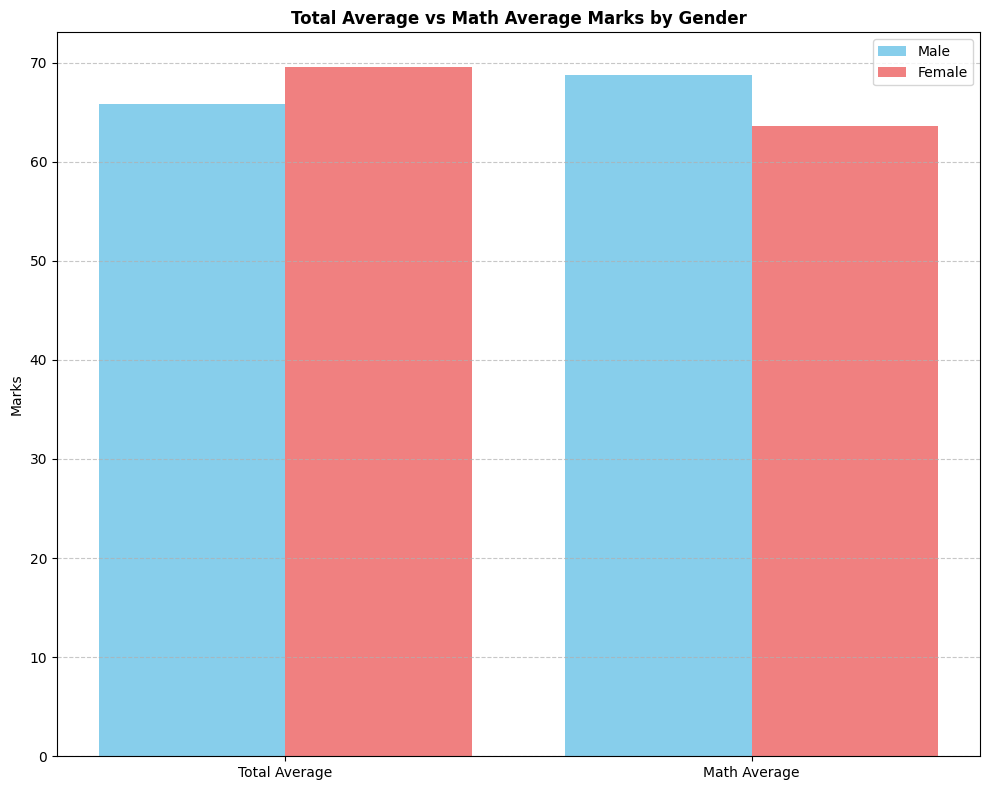

In [41]:
gender_group = df.groupby('gender')[['math score', 'average']].mean()

# Plotting
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='lightcoral')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)


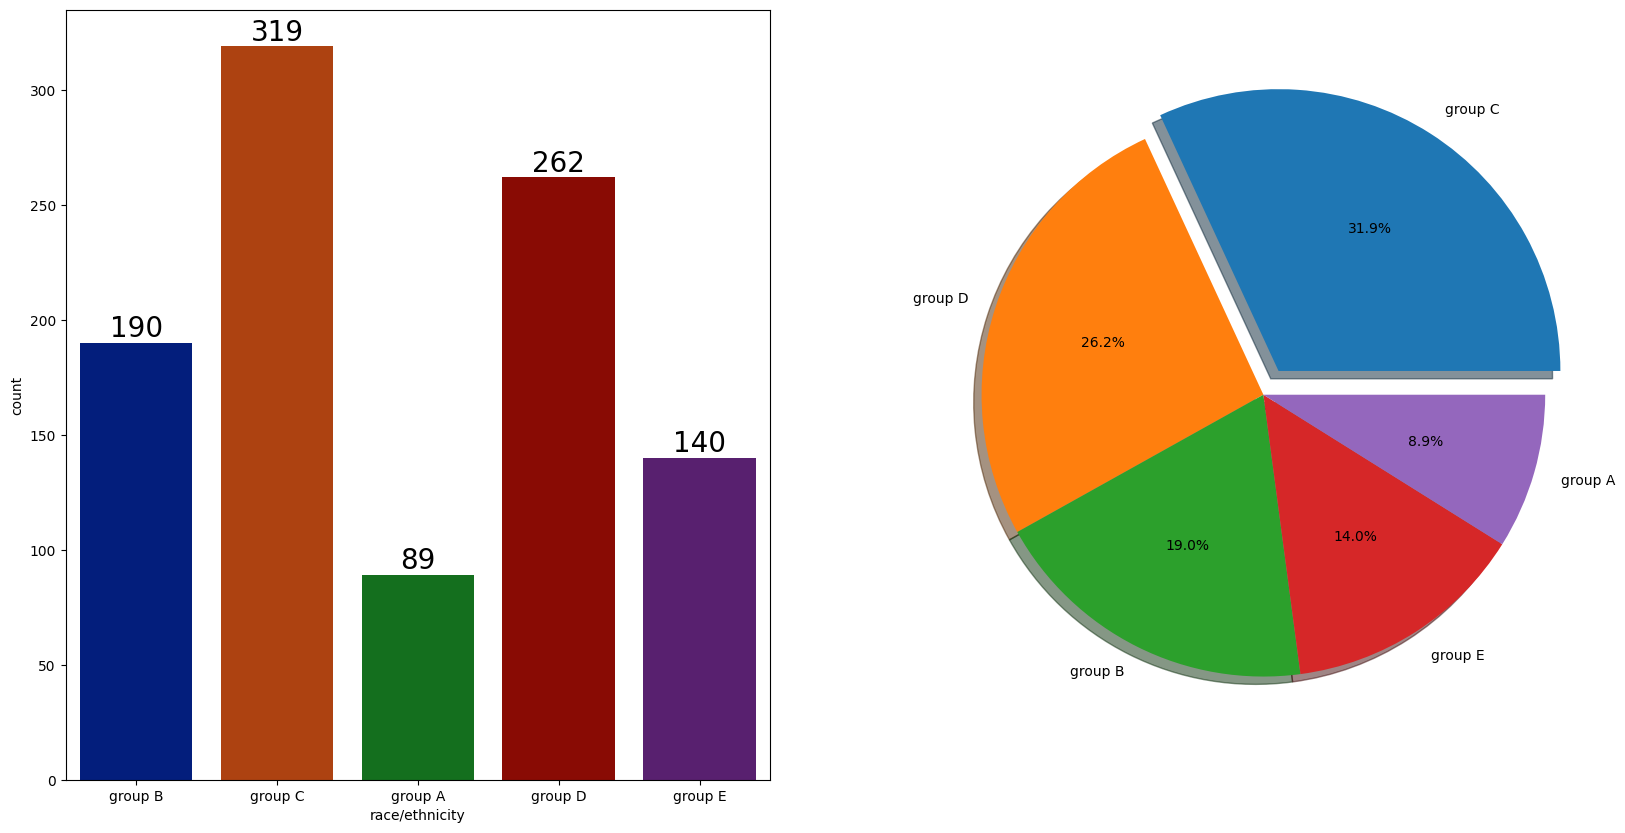

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'dark',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

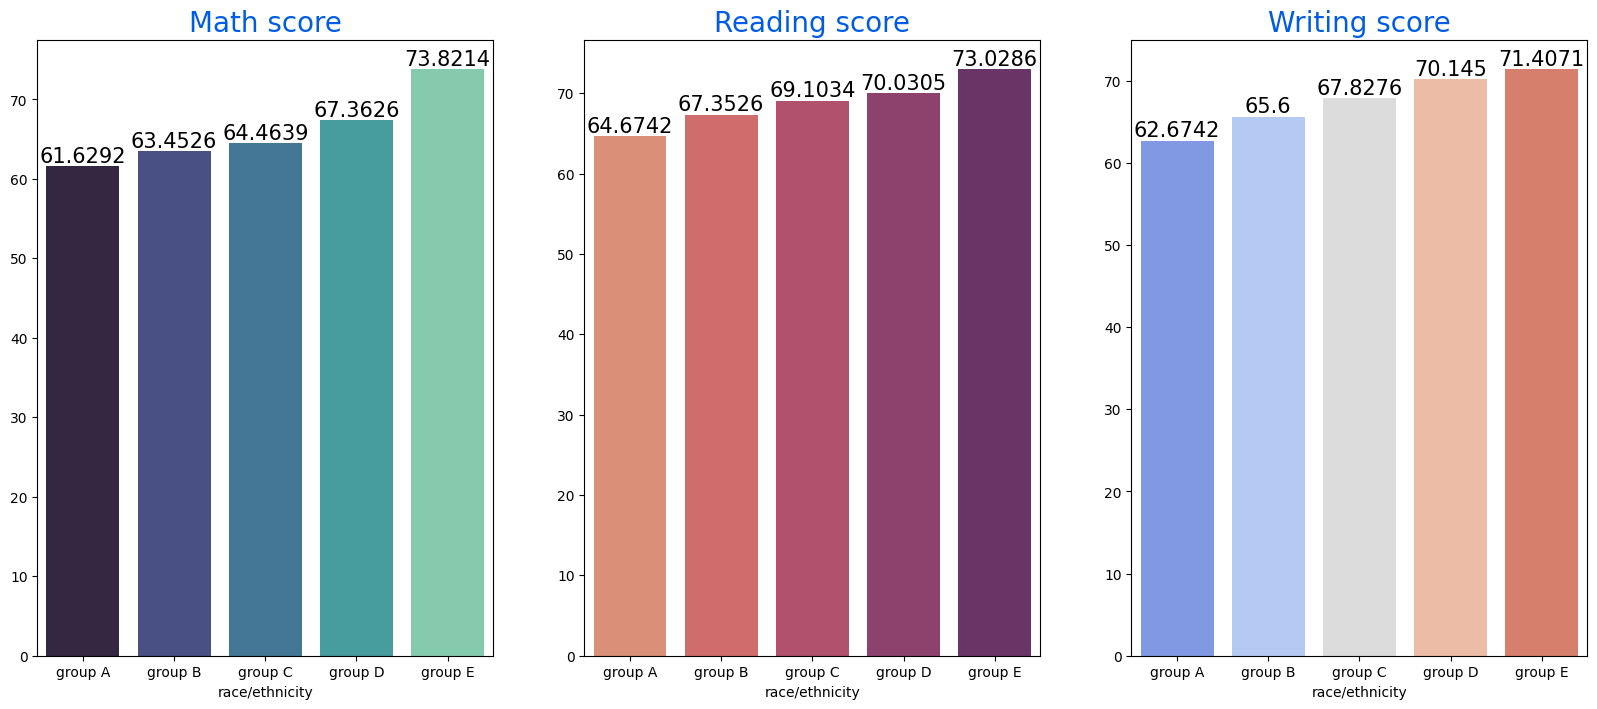

In [43]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
plt.show()


# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

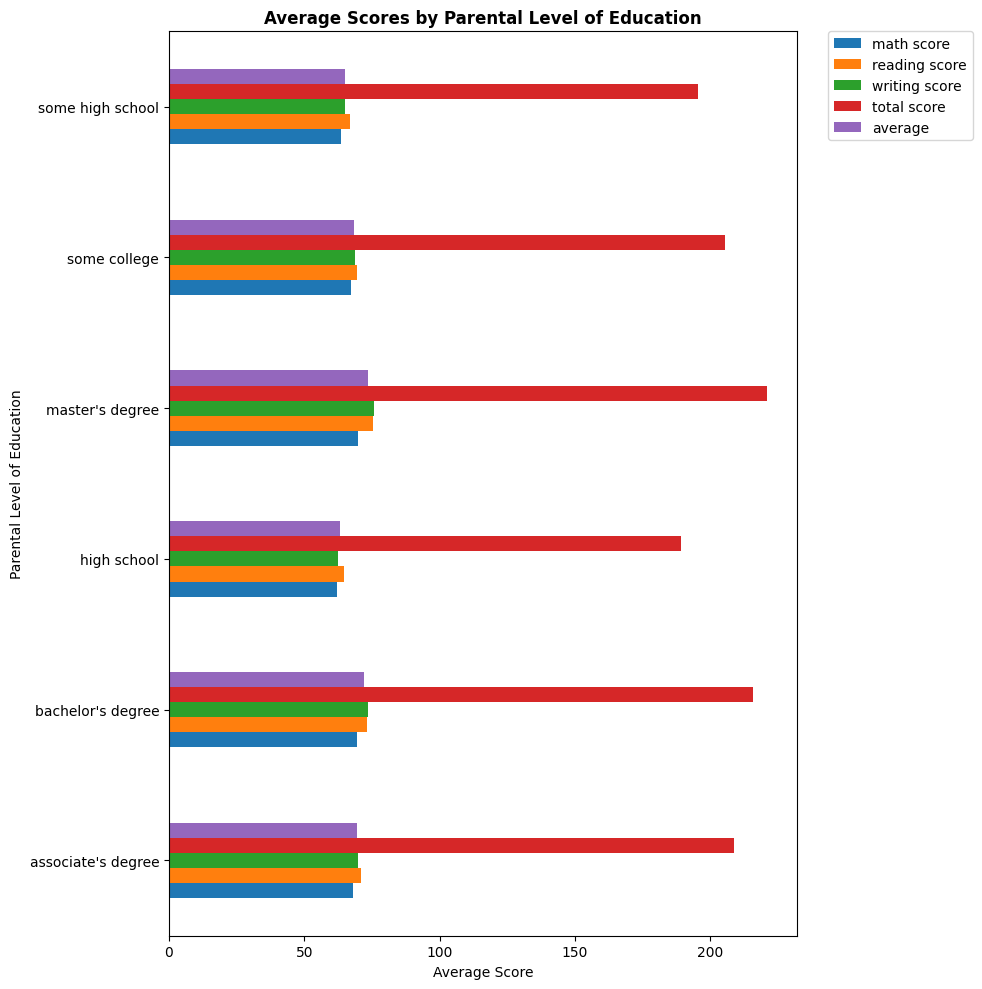

In [44]:
numeric_df = df.select_dtypes(include='number')
grouped = df.groupby('parental level of education')[numeric_df.columns].mean()
grouped.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Average Scores by Parental Level of Education", fontweight='bold')
plt.xlabel("Average Score")
plt.ylabel("Parental Level of Education")
plt.tight_layout()
plt.show()

# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

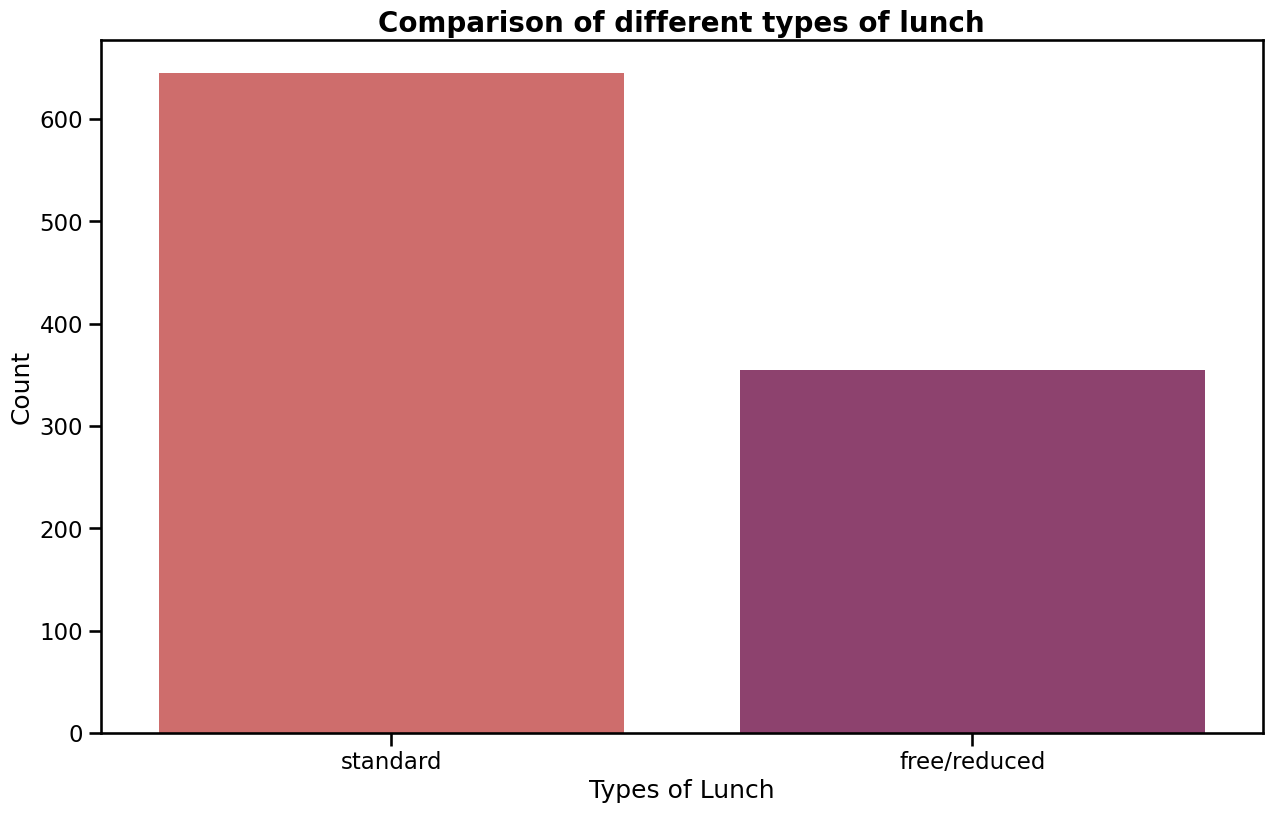

In [45]:
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data=df, x='lunch', palette='flare')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

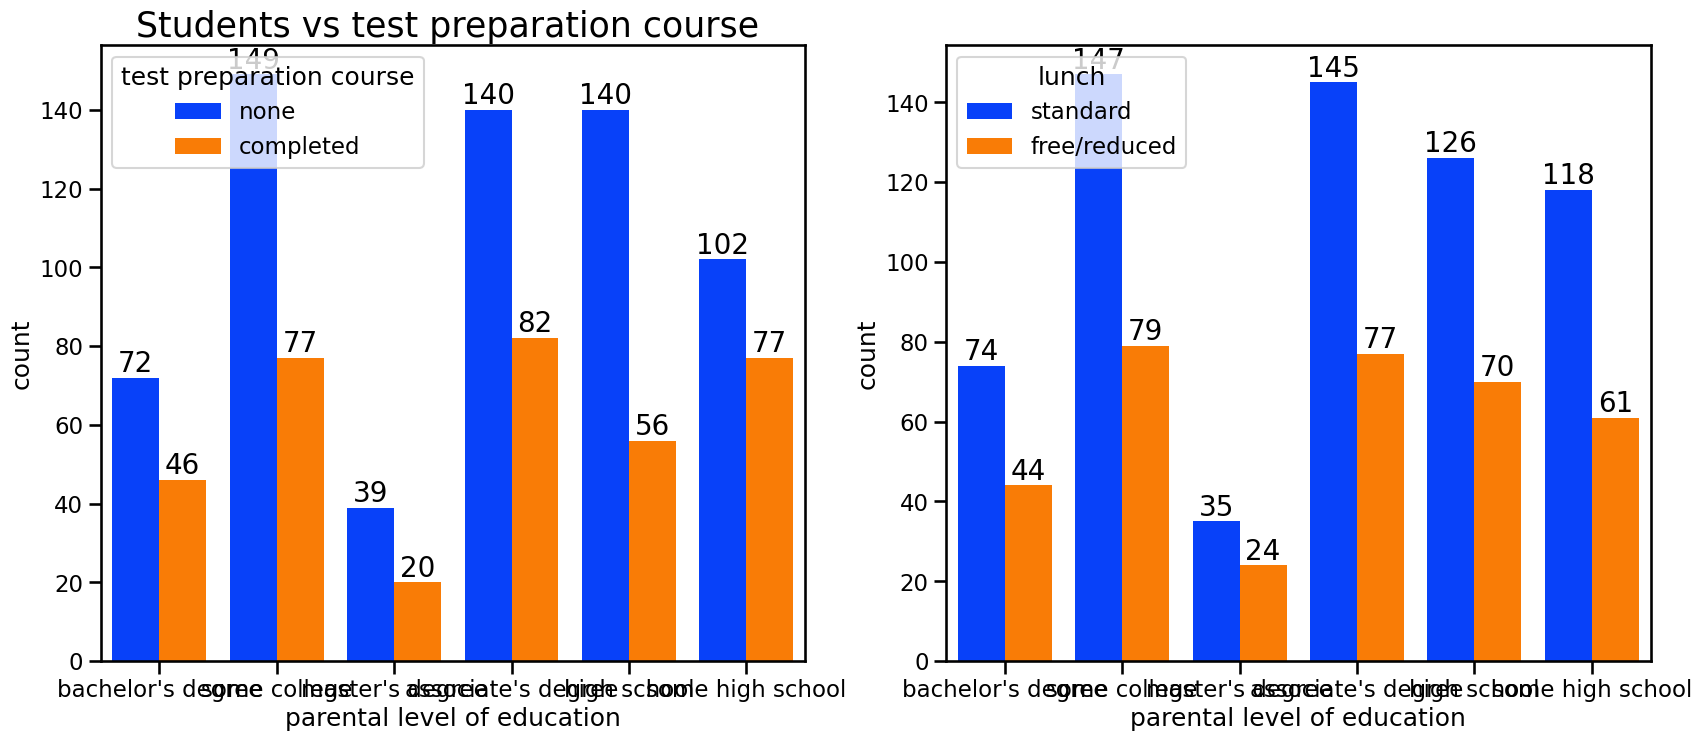

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
plt.show()


# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

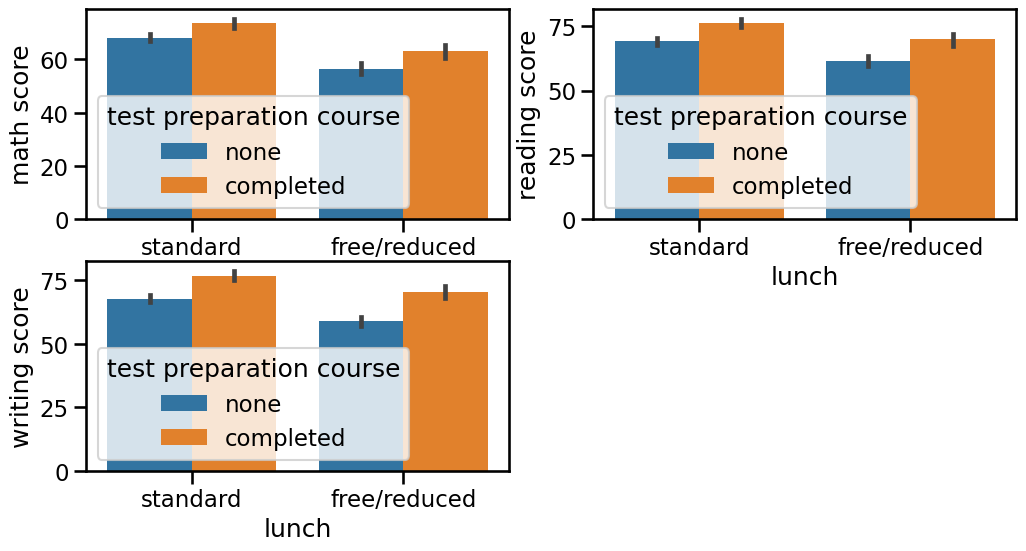

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()


# CHECKING OUTLIERS

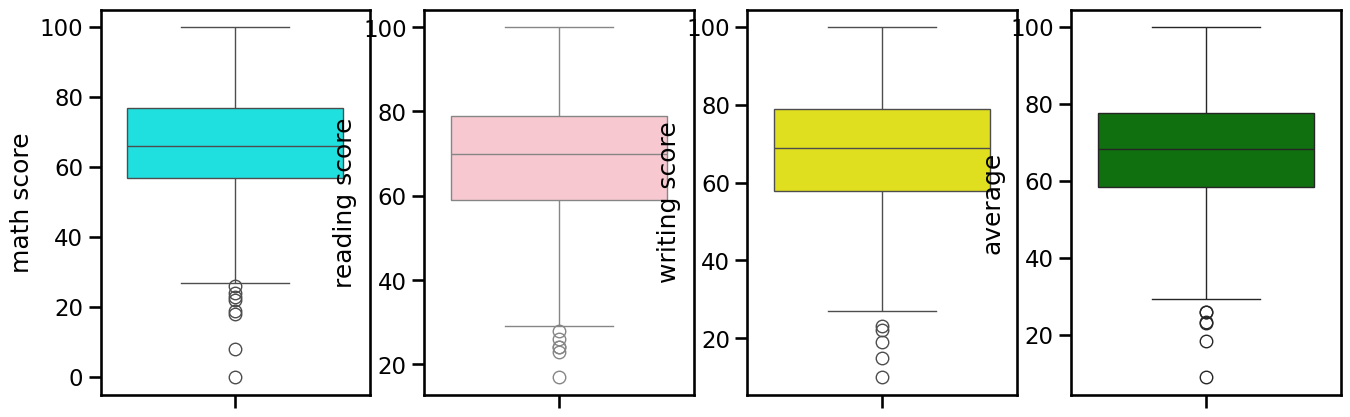

In [48]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='cyan')
plt.subplot(142)
sns.boxplot(df['reading score'],color='pink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='green')
plt.show()

# MUTIVARIATE ANALYSIS USING PAIRPLOT

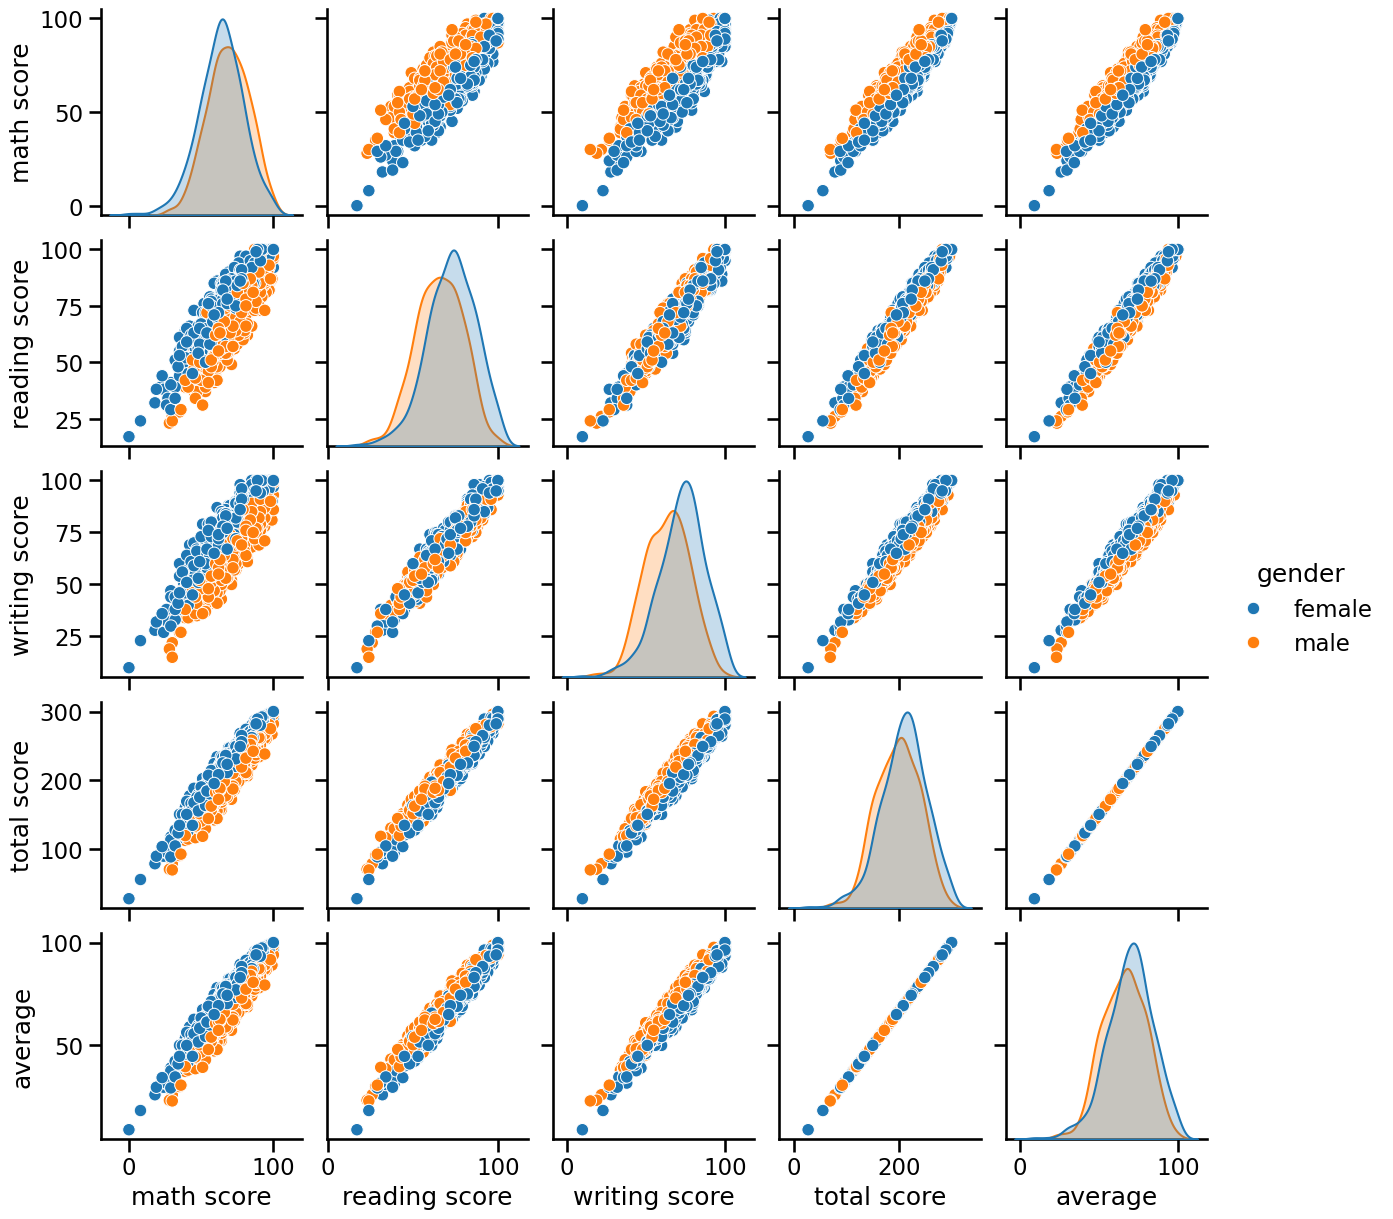

In [49]:
sns.pairplot(df,hue = 'gender')
plt.show()